In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Warnings

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Preprocessing

from sklearn.neighbors import LocalOutlierFactor 
from sklearn import preprocessing

# Modeling

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
!pip install xgboost
import xgboost
from xgboost import XGBRegressor
!pip install lightgbm
from lightgbm import LGBMRegressor
!pip install catboost
from catboost import CatBoostRegressor

# Model Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=d56da241a4aa87458aff1f260eee4f2a86816032fca26d91cf36e9ed7c22c3f5
  Stored in directory: c:\users\abdulkadir karakus\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [7]:
hitters=pd.read_csv("Hitters.csv")
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
df=hitters.copy()
print(df.shape)
df.info()

(322, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtype

In [9]:
df.isnull().sum().sum()

59

In [10]:
df.shape

(322, 20)

In [11]:
df1=df.dropna()
df1.shape

(263, 20)

In [12]:
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.80,0.90,0.95,0.99]).T 

,count,mean,std,min,1%,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
AtBat,322.0,380.928571,153.404981,16.0,20.42,161.00,194.1,255.25,379.5,512.00,535.6,584.9000,609.90,658.59000,687.0
Hits,322.0,101.024845,46.454741,1.0,4.42,39.00,45.1,64.00,96.0,137.00,144.0,163.0000,174.00,210.79000,238.0
HmRun,322.0,10.770186,8.709037,0.0,0.00,0.00,1.0,4.00,8.0,16.00,18.0,24.0000,28.95,33.00000,40.0
Runs,322.0,50.909938,26.024095,0.0,1.21,17.00,20.1,30.25,48.0,69.00,75.8,89.0000,94.00,107.79000,130.0
RBI,322.0,48.027950,26.166895,0.0,2.00,14.00,19.0,28.00,44.0,64.75,73.0,86.0000,96.00,112.37000,121.0
Walks,322.0,38.742236,21.639327,0.0,1.00,11.05,15.0,22.00,35.0,53.00,59.0,69.9000,78.00,93.58000,105.0
Years,322.0,7.444099,4.926087,1.0,1.00,1.00,2.0,4.00,6.0,11.00,12.0,15.0000,17.00,19.79000,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,41.00,216.50,342.2,816.75,1928.0,3924.25,4483.0,6123.4000,7125.60,8749.97000,14053.0
CHits,322.0,717.571429,654.472627,4.0,9.84,54.00,86.0,209.00,508.0,1059.25,1229.2,1659.6000,2017.15,2500.34000,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,0.00,2.00,4.0,14.00,37.5,90.00,103.8,194.9000,265.65,373.12000,548.0


In [13]:
df1.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.80,0.90,0.95,0.99]).T 

,count,mean,std,min,1%,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
AtBat,263.0,403.642586,147.307209,19.0,126.62,181.3,205.6,282.5,413.0,526.0,554.6,591.0000,617.8,668.32000,687.0
Hits,263.0,107.828897,45.125326,1.0,30.10,42.1,52.0,71.5,103.0,141.5,148.6,168.0000,177.9,211.76000,238.0
HmRun,263.0,11.619772,8.757108,0.0,0.00,1.0,2.0,5.0,9.0,18.0,20.0,25.0000,29.0,33.00000,40.0
Runs,263.0,54.745247,25.539816,0.0,11.10,19.1,24.0,33.5,52.0,73.0,77.6,90.0000,96.8,111.42000,130.0
RBI,263.0,51.486692,25.882714,0.0,8.00,18.0,23.0,30.0,47.0,71.0,75.6,88.0000,99.8,114.14000,121.0
Walks,263.0,41.114068,21.718056,0.0,4.24,12.0,16.0,23.0,37.0,57.0,62.0,71.8000,78.9,94.00000,105.0
Years,263.0,7.311787,4.793616,1.0,1.00,1.0,2.0,4.0,6.0,10.0,12.0,14.0000,16.9,19.38000,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,190.30,279.9,413.6,842.5,1931.0,3890.5,4406.8,6098.0000,7120.1,8732.34000,14053.0
CHits,263.0,722.186312,648.199644,4.0,43.24,68.0,102.2,212.0,516.0,1054.0,1209.0,1658.0000,2023.5,2481.48000,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,0.62,2.0,5.0,15.0,40.0,92.5,105.8,174.8000,258.4,348.52000,548.0


In [14]:
df1['Experience'] = pd.cut(df1['Years'],4)

pd.cut(df['Years'],4).value_counts()

(0.977, 6.75]    172
(6.75, 12.5]      90
(12.5, 18.25]     55
(18.25, 24.0]      5
Name: Years, dtype: int64

In [15]:
df1['Experience'] = pd.cut(df['Years'],[0,5,10,15,25],labels=[1,2,3,4])
df1.groupby(['League','Division', 'Experience']).agg({'Salary':'mean'})

Salary
League Division Experience            
A      E        1           427.159091
                2           787.252400
                3           816.311353
                4           665.416750
       W        1           223.935897
                2           609.479188
                3           835.250000
                4           480.416667
N      E        1           325.930097
                2           812.394684
                3           894.322667
                4           662.500000
       W        1           287.354167
                2           539.393955
                3           721.894000
                4           665.555500

In [16]:
df1['Salary'] = df1['Salary'].fillna(df1.groupby(['League','Division', 'Experience'])['Salary'].transform('mean'))

In [17]:
df1.describe([0.01, 0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
AtBat,263.0,403.642586,147.307209,19.0,126.62,181.3,205.6,282.5,413.0,526.0,591.0000,617.8,668.32000,687.0
Hits,263.0,107.828897,45.125326,1.0,30.10,42.1,52.0,71.5,103.0,141.5,168.0000,177.9,211.76000,238.0
HmRun,263.0,11.619772,8.757108,0.0,0.00,1.0,2.0,5.0,9.0,18.0,25.0000,29.0,33.00000,40.0
Runs,263.0,54.745247,25.539816,0.0,11.10,19.1,24.0,33.5,52.0,73.0,90.0000,96.8,111.42000,130.0
RBI,263.0,51.486692,25.882714,0.0,8.00,18.0,23.0,30.0,47.0,71.0,88.0000,99.8,114.14000,121.0
Walks,263.0,41.114068,21.718056,0.0,4.24,12.0,16.0,23.0,37.0,57.0,71.8000,78.9,94.00000,105.0
Years,263.0,7.311787,4.793616,1.0,1.00,1.0,2.0,4.0,6.0,10.0,14.0000,16.9,19.38000,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,190.30,279.9,413.6,842.5,1931.0,3890.5,6098.0000,7120.1,8732.34000,14053.0
CHits,263.0,722.186312,648.199644,4.0,43.24,68.0,102.2,212.0,516.0,1054.0,1658.0000,2023.5,2481.48000,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,0.62,2.0,5.0,15.0,40.0,92.5,174.8000,258.4,348.52000,548.0


In [18]:
num_features = df1.select_dtypes(['int64']).columns

for feature in num_features:

    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    
    IQR = Q3-Q1
    
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    
    if df1[(df1[feature] > upper) | (df1[feature] < lower)].any(axis=None):
        print(feature," : " + str(df1[(df1[feature] > upper) | (df1[feature] < lower)].shape[0]))
    else:
        print(feature, " : 0")
        
  

AtBat  : 0
Hits  : 0
HmRun  : 1
Runs  : 0
RBI  : 0
Walks  : 0
Years  : 3
CAtBat  : 4
CHits  : 5
CHmRun  : 23
CRuns  : 8
CRBI  : 22
CWalks  : 20
PutOuts  : 29
Assists  : 5
Errors  : 2


In [19]:
df1.shape

(263, 21)

In [21]:
from sklearn.neighbors import LocalOutlierFactor

clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(df1[num_features])
df_scores=clf.negative_outlier_factor_
df_scores= np.sort(df_scores)
df_scores[0:20]

array([-4.67601096, -2.44861862, -2.41886961, -1.9539352 , -1.91323419,
       -1.85450277, -1.7859493 , -1.65334844, -1.58420949, -1.58094228,
       -1.5545962 , -1.52742576, -1.51163292, -1.4922859 , -1.47182166,
       -1.35271865, -1.35067267, -1.34915509, -1.32768365, -1.26284334])

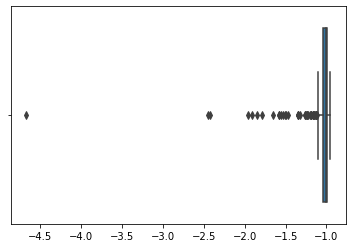

In [22]:
sns.boxplot(df_scores);

In [23]:
threshold=np.sort(df_scores)[7]
print(threshold)
df1 = df1.loc[df_scores > threshold]
df1 = df1.reset_index(drop=True)

-1.6533484374915808


In [24]:
cat_features = ['League','Division','NewLeague'] 
num_features = list(df.select_dtypes(['int64']).columns)

In [42]:
cat_features

['League', 'Division', 'NewLeague', 'Experience', 'CRBI_bins']

In [25]:
corr = df.corr()

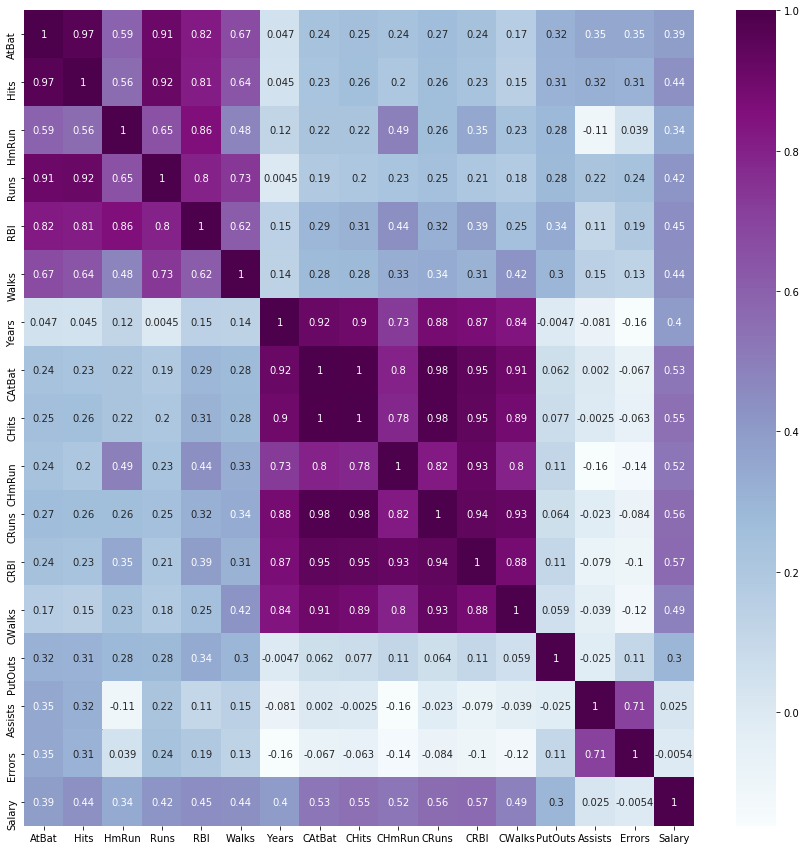

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap="BuPu")
plt.show()

In [28]:
df1.groupby('League').mean().T

League,A,N
AtBat,424.205882,381.974790
Hits,114.147059,101.142857
HmRun,13.595588,9.588235
Runs,59.816176,49.764706
RBI,56.176471,46.689076
Walks,42.529412,40.134454
Years,7.500000,7.184874
CAtBat,2720.294118,2625.252101
CHits,739.904412,714.042017
CHmRun,78.661765,59.806723


Exploring LEAGUE feature
A    0.533333
N    0.466667
Name: League, dtype: float64


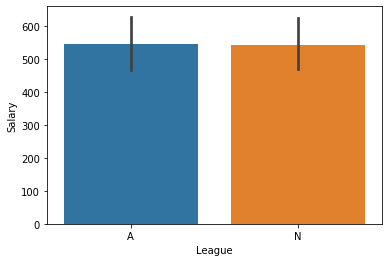

Exploring DIVISION feature
W    0.505882
E    0.494118
Name: Division, dtype: float64


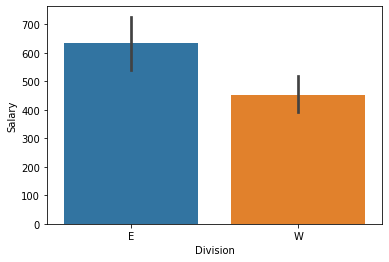

Exploring NEWLEAGUE feature
A    0.537255
N    0.462745
Name: NewLeague, dtype: float64


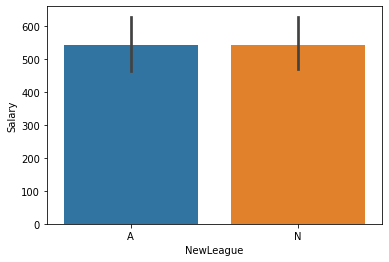

In [29]:
for col in cat_features:
    print('Exploring {} feature'.format(col.upper()))
    print(df1[col].value_counts(normalize=True,ascending=False))
    sns.barplot(x=col, y="Salary", data=df1)
    plt.show()

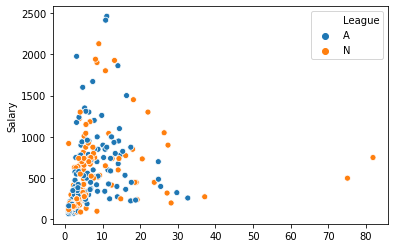

In [43]:
sns.scatterplot(x=df1['CHits']/df1['Hits'] ,y='Salary',data=df1,hue='League')
plt.show()

In [30]:
df1['Experience'] = pd.cut(df1['Years'],[0,5,10,15,25],labels=[1,2,3,4])

In [32]:
df1['Experience'].value_counts()

1    111
2     82
3     44
4     18
Name: Experience, dtype: int64

In [33]:
df1['CRBI_bins'] = pd.cut(df['CRBI'],4,labels=[1,2,3,4])

In [34]:
cat_features.extend(['Experience','CRBI_bins'])

In [35]:
cat_features

['League', 'Division', 'NewLeague', 'Experience', 'CRBI_bins']

In [44]:
df1['New_HitRate']=df1["CAtBat"]/df1["CHits"]
df1['New_AtBat']=df1["CAtBat"]/df1["AtBat"]
df1['New_RBI']=df1["CRBI"]/df1["RBI"]
df1['New_Walks']=df1["CWalks"]/df1["Walks"]
df1['New_Hits']=df1["CHits"]/df1["Hits"]
df1['New_HmRun']=df1["CHmRun"]/df1["HmRun"]
df1['New_Runs']=df1["CRuns"]/df1["Runs"]
df1['New_ChmrunRate']=df1["CHmRun"]/df1["CHits"]
df1['New_Cat']=df1["CAtBat"]/df1["CRuns"]
df1['New_Assist']=df1["Hits"]/df1["Assists"]
df1["CAtBat/Years"]= df1["CAtBat"]/df1["Years"]
df1["CHits/Years"]= df1["CHits"]/df1["Years"]
df1["CHmRun/Years"]= df1["CHmRun"]/df1["Years"]
df1["Assists/Errors"]= df1["Assists"]/df1["Errors"]
df1["AtBat/PutOuts"]= df1["AtBat"]/df1["PutOuts"]
df1["Walks/Years"]=df1["Walks"]/df["Years"]



In [45]:
num_features.extend(['CAtBat/Years','CHits/Years','CHmRun/Years','Assists/Errors','AtBat/PutOuts','Walks/Years','New_HitRate','New_RBI','New_Walks','New_Hits','New_HmRun','New_Runs','New_ChmrunRate','New_AtBat','New_Cat','New_Assist'])

In [46]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [48]:
df1= pd.get_dummies(df1, columns = cat_features, drop_first = True)

In [49]:
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,New_HitRate,New_AtBat,New_RBI,New_Walks,New_Hits,New_HmRun,New_Runs,New_ChmrunRate,New_Cat,New_Assist,CAtBat/Years,CHits/Years,CHmRun/Years,Assists/Errors,AtBat/PutOuts,Walks/Years,League_N,Division_W,NewLeague_N,Experience_2,Experience_3,Experience_4,CRBI_bins_2,CRBI_bins_3,CRBI_bins_4
0,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,1100.000,3.908408,12.982544,13.484848,13.323077,14.478261,14.882353,16.000000,0.189940,6.640306,inf,400.461538,102.461538,19.461538,NaN,inf,65.000000,0,0,0,0,1,0,0,0,0
1,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22,517.143,3.562308,8.067944,6.720000,8.271186,8.176101,4.285714,6.560748,0.069231,6.596866,0.357303,463.100000,130.000000,9.000000,20.227273,2.411765,4.214286,0,0,0,1,0,0,0,0,0
2,202,53,4,31,26,27,9,1876,467,15,192,186,161,304,45,11,512.500,4.017131,9.287129,7.153846,5.962963,8.811321,3.750000,6.193548,0.032120,9.770833,1.177778,208.444444,51.888889,1.666667,4.090909,0.664474,9.000000,1,1,1,1,0,0,0,0,0
3,418,113,13,48,61,47,4,1512,392,41,205,204,203,211,11,7,550.000,3.857143,3.617225,3.344262,4.319149,3.469027,3.153846,4.270833,0.104592,7.375610,10.272727,378.000000,98.000000,10.250000,1.571429,1.981043,4.272727,1,0,1,0,0,0,0,1,0
4,239,60,0,30,11,22,6,1941,510,4,309,103,207,121,151,6,700.000,3.805882,8.121339,9.363636,9.409091,8.500000,inf,10.300000,0.007843,6.281553,0.397351,323.500000,85.000000,0.666667,25.166667,1.975207,11.000000,0,0,0,1,0,0,0,0,0


In [50]:
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1 = df1.dropna()

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

df1[num_features] = std_scaler.fit_transform(df1[num_features])

In [52]:
y = df1["Salary"]
X = df1.drop('Salary', axis=1)

In [53]:
from sklearn.feature_selection import RFECV #Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
from sklearn.ensemble import RandomForestRegressor

def select_features(X,y):
    # numerik olmayan degiskenlerin silinmesi
    X = X.select_dtypes([np.number]).dropna(axis=1)
    
    clf = RandomForestRegressor(random_state=46)
    clf.fit(X, y)
    
    selector = RFECV(clf,cv=10)
    selector.fit(X, y)
    
    features = pd.DataFrame()
    features['Feature'] = X.columns
    features['Importance'] = clf.feature_importances_
    features.sort_values(by=['Importance'], ascending=False, inplace=True)
    features.set_index('Feature', inplace=True)
    features.plot(kind='bar', figsize=(12, 5))
    
    
    best_columns = list(X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns

Best Columns 
------------
['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'New_HitRate', 'New_AtBat', 'New_RBI', 'New_Walks', 'New_Hits', 'New_HmRun', 'New_Runs', 'New_ChmrunRate', 'New_Cat', 'New_Assist', 'CAtBat/Years', 'CHits/Years', 'CHmRun/Years', 'Assists/Errors', 'AtBat/PutOuts', 'Walks/Years', 'NewLeague_N', 'Experience_3', 'CRBI_bins_2']



['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'New_HitRate',
 'New_AtBat',
 'New_RBI',
 'New_Walks',
 'New_Hits',
 'New_HmRun',
 'New_Runs',
 'New_ChmrunRate',
 'New_Cat',
 'New_Assist',
 'CAtBat/Years',
 'CHits/Years',
 'CHmRun/Years',
 'Assists/Errors',
 'AtBat/PutOuts',
 'Walks/Years',
 'NewLeague_N',
 'Experience_3',
 'CRBI_bins_2']

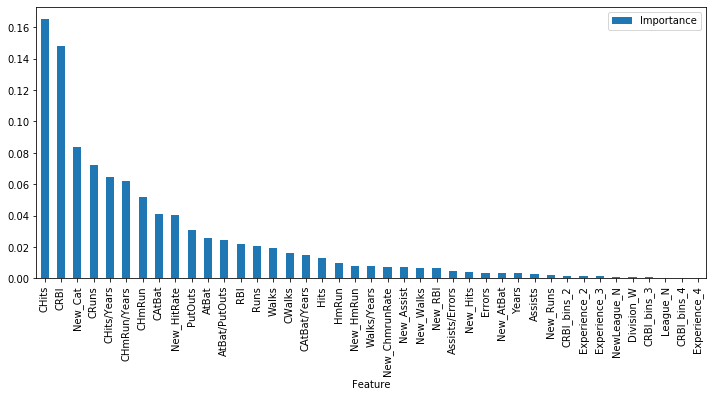

In [54]:
best_features = select_features(X,y)
best_features

In [55]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,New_HitRate,New_AtBat,New_RBI,New_Walks,New_Hits,New_HmRun,New_Runs,New_ChmrunRate,New_Cat,New_Assist,CAtBat/Years,CHits/Years,CHmRun/Years,Assists/Errors,AtBat/PutOuts,Walks/Years,League_N,Division_W,NewLeague_N,Experience_2,Experience_3,Experience_4,CRBI_bins_2,CRBI_bins_3,CRBI_bins_4
1,1.105601,1.066464,1.048557,1.991573,0.862335,0.821728,0.632502,0.961472,0.992344,0.310117,1.158296,0.601538,0.982853,-0.254693,2.225378,2.030432,-0.765653,0.169831,0.042483,0.169015,0.159884,-0.271045,-0.044078,-0.451153,-0.832352,-0.611089,0.981023,1.015960,0.053230,0.495189,0.119643,-0.471930,0,0,0,1,0,0,0,0,0
2,-1.447369,-1.280990,-0.924426,-1.003840,-1.030267,-0.689873,0.412085,-0.336671,-0.396867,-0.686439,-0.524719,-0.445674,-0.366034,-0.019949,-0.527321,0.318101,0.581296,0.336315,0.108009,-0.087532,0.242422,-0.353573,-0.091442,-1.096786,1.286916,-0.548036,-1.031427,-1.024415,-1.089483,-0.542983,-0.899563,-0.039052,1,1,1,1,0,0,0,0,0
3,0.035000,0.047758,0.120095,-0.333814,0.321591,0.254877,-0.690002,-0.508186,-0.521946,-0.340967,-0.481819,-0.386397,-0.192783,-0.350725,-0.761301,-0.304565,0.107496,-0.437930,-0.467369,-0.270234,-0.451734,-0.445412,-0.339448,0.164038,-0.312382,0.150910,0.308509,0.180074,0.248010,-0.705080,-0.131600,-0.466644,1,0,1,0,0,0,0,1,0
5,-1.488546,-1.502448,-0.576252,-1.082667,-0.991643,-0.548161,1.293754,0.301798,0.200177,-0.407404,0.082486,-0.103189,-0.048406,-0.816657,-0.527321,-0.148898,0.282877,1.319168,0.649752,0.131465,1.590471,-0.138999,0.782054,-0.896430,0.500530,-0.565114,-0.714579,-0.722121,-0.917676,-0.444284,0.141946,-0.606433,1,0,1,0,1,0,0,0,0
6,1.064424,1.044319,0.932499,1.282133,0.862335,1.483053,1.734589,2.580969,2.615036,1.466122,2.290207,2.211874,1.989362,-0.727738,1.158707,0.162435,-0.803600,1.007762,1.027226,0.364210,0.966782,0.432096,0.624181,-0.300842,-0.082048,-0.596678,1.571877,1.578441,0.489538,1.059604,1.868254,2.448382,1,1,1,0,1,0,0,0,0


 # **KNN**

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

from warnings import filterwarnings
filterwarnings('ignore')

In [58]:
y = df1["Salary"]
X = df1.drop('Salary', axis=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [60]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,New_HitRate,New_AtBat,New_RBI,New_Walks,New_Hits,New_HmRun,New_Runs,New_ChmrunRate,New_Cat,New_Assist,CAtBat/Years,CHits/Years,CHmRun/Years,Assists/Errors,AtBat/PutOuts,Walks/Years,League_N,Division_W,NewLeague_N,Experience_2,Experience_3,Experience_4,CRBI_bins_2,CRBI_bins_3,CRBI_bins_4
1,1.105601,1.066464,1.048557,1.991573,0.862335,0.821728,0.632502,0.961472,0.992344,0.310117,1.158296,0.601538,0.982853,-0.254693,2.225378,2.030432,-0.765653,0.169831,0.042483,0.169015,0.159884,-0.271045,-0.044078,-0.451153,-0.832352,-0.611089,0.981023,1.015960,0.053230,0.495189,0.119643,-0.471930,0,0,0,1,0,0,0,0,0
2,-1.447369,-1.280990,-0.924426,-1.003840,-1.030267,-0.689873,0.412085,-0.336671,-0.396867,-0.686439,-0.524719,-0.445674,-0.366034,-0.019949,-0.527321,0.318101,0.581296,0.336315,0.108009,-0.087532,0.242422,-0.353573,-0.091442,-1.096786,1.286916,-0.548036,-1.031427,-1.024415,-1.089483,-0.542983,-0.899563,-0.039052,1,1,1,1,0,0,0,0,0
3,0.035000,0.047758,0.120095,-0.333814,0.321591,0.254877,-0.690002,-0.508186,-0.521946,-0.340967,-0.481819,-0.386397,-0.192783,-0.350725,-0.761301,-0.304565,0.107496,-0.437930,-0.467369,-0.270234,-0.451734,-0.445412,-0.339448,0.164038,-0.312382,0.150910,0.308509,0.180074,0.248010,-0.705080,-0.131600,-0.466644,1,0,1,0,0,0,0,1,0
5,-1.488546,-1.502448,-0.576252,-1.082667,-0.991643,-0.548161,1.293754,0.301798,0.200177,-0.407404,0.082486,-0.103189,-0.048406,-0.816657,-0.527321,-0.148898,0.282877,1.319168,0.649752,0.131465,1.590471,-0.138999,0.782054,-0.896430,0.500530,-0.565114,-0.714579,-0.722121,-0.917676,-0.444284,0.141946,-0.606433,1,0,1,0,1,0,0,0,0
6,1.064424,1.044319,0.932499,1.282133,0.862335,1.483053,1.734589,2.580969,2.615036,1.466122,2.290207,2.211874,1.989362,-0.727738,1.158707,0.162435,-0.803600,1.007762,1.027226,0.364210,0.966782,0.432096,0.624181,-0.300842,-0.082048,-0.596678,1.571877,1.578441,0.489538,1.059604,1.868254,2.448382,1,1,1,0,1,0,0,0,0


In [61]:
y.head()

1    517.143
2    512.500
3    550.000
5    240.000
6    775.000
Name: Salary, dtype: float64

In [62]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [63]:
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

244.85166731996708

# **KNN MODEL TUNING**

In [64]:
RMSE = []

for k in range(20):
    k = k + 2
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k =", k, "için RMSE değeri:", rmse)

k = 2 için RMSE değeri: 296.8996727696734
k = 3 için RMSE değeri: 269.08251443427713
k = 4 için RMSE değeri: 259.8045553907867
k = 5 için RMSE değeri: 244.85166731996708
k = 6 için RMSE değeri: 253.31236065979854
k = 7 için RMSE değeri: 252.63416969278416
k = 8 için RMSE değeri: 260.47560196346404
k = 9 için RMSE değeri: 255.0291785190594
k = 10 için RMSE değeri: 245.149264239505
k = 11 için RMSE değeri: 237.76321828592717
k = 12 için RMSE değeri: 239.59646159848762
k = 13 için RMSE değeri: 237.80431567073765
k = 14 için RMSE değeri: 235.86446485403036
k = 15 için RMSE değeri: 234.50405360344055
k = 16 için RMSE değeri: 238.0329951876632
k = 17 için RMSE değeri: 240.09760488784843
k = 18 için RMSE değeri: 234.66144244587917
k = 19 için RMSE değeri: 235.8408097534354
k = 20 için RMSE değeri: 232.83670912121116
k = 21 için RMSE değeri: 231.36501529209937


In [66]:
knn_params = {"n_neighbors": np.arange(2,30,1)}

knn_model = KNeighborsRegressor()

knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)

In [67]:
knn_cv_model.best_params_

{'n_neighbors': 6}

In [68]:
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)

# **SVR**

In [70]:
svr_model = SVR("linear").fit(X_train, y_train)

In [71]:

y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

243.28673210261786

In [72]:
y_pred = knn_tuned.predict(X_test)

In [73]:
np.sqrt(mean_squared_error(y_test, y_pred))

253.31236065979854

# **SVR MODEL TUNING**

In [74]:
svr_model = SVR("linear") 

svr_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1]}

svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, n_jobs = -1, verbose =  2).fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   41.0s finished


In [75]:
svr_cv_model.best_params_

{'C': 1}

In [78]:
svr_tuned = SVR("linear", C = 0.001).fit(X_train, y_train)

In [79]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

325.5609518359149

In [80]:
#nonlinear
svr_model = SVR() 

svr_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1, 10, 100, 500,1000]}

svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, n_jobs = -1, verbose =  2).fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished


In [81]:
svr_cv_model.best_params_

{'C': 1000}

In [82]:
svr_tuned = SVR(**svr_cv_model.best_params_).fit(X_train, y_train)

In [83]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

227.93881832387683

# **Yapay Sinir Ağları**

In [84]:
scaler = StandardScaler()

In [86]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [87]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [88]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [89]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

498.32652306923075

# **Yapay Sinir Ağları Model Tuning**

In [90]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100), (1000,100,10)]}

In [91]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.6min finished


In [100]:
mlp_cv_model.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (1000, 100, 10)}

In [101]:
mlp_tuned = MLPRegressor(**mlp_cv_model.best_params_).fit(X_train_scaled, y_train)

In [102]:
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

323.1188862517905

In [103]:
# **CART**

In [104]:
cart_model = DecisionTreeRegressor(random_state = 52)
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=52, splitter='best')

In [105]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

350.3406931000228

In [98]:
# **Cart Model Tuning**

In [99]:
cart_params = {"max_depth": [2,3,4,5,10,20, 100, 1000],
              "min_samples_split": [2,10,5,30,50,10]}

In [106]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [107]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [108]:
cart_tuned = DecisionTreeRegressor(**cart_cv_model.best_params_).fit(X_train, y_train)

In [109]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

289.6804906925757

# **RANDOM FORESTS**

In [110]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [111]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

248.04653467774924

# **RF MODEL TUNING**

In [112]:
rf_params = {"max_depth": [5,8,10,None],
            "max_features": [2,5,10,15,17],
            "n_estimators": [100,200, 500, 1000],
            "min_samples_split": [2,5,10,20,30]}

In [113]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 24.4min finished


In [114]:
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)

In [115]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

233.82140193077055

In [116]:
rf_tuned.feature_importances_

array([0.01529304, 0.02314031, 0.01012908, 0.01788339, 0.04379919,
       0.02254218, 0.005497  , 0.06192775, 0.09007809, 0.08506294,
       0.06776034, 0.14990149, 0.04640449, 0.01880373, 0.00662945,
       0.00366841, 0.035928  , 0.01060229, 0.00665956, 0.00757234,
       0.00770268, 0.00693961, 0.00509535, 0.00974424, 0.09248919,
       0.00625121, 0.02184068, 0.04072684, 0.04954281, 0.00639218,
       0.01097045, 0.00512566, 0.0011364 , 0.00184921, 0.00133075,
       0.00110211, 0.00099149, 0.00015116, 0.00060265, 0.00056824,
       0.00016402])

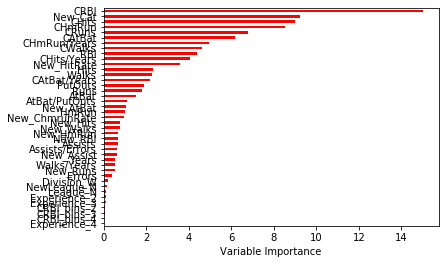

In [117]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# **GradientBoosting**

In [120]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [121]:
y_pred = gbm_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

274.5295674879685

In [122]:
# **GB Model Tuning**

In [123]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8,9,10],
             "n_estimators": [200,500,1000],
             "subsample": [1,0.4,0.5,0.7],
             "loss": ["ls","lad","quantile"]}

In [124]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [125]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose = 2).fit(X, y)

Fitting 10 folds for each of 540 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 56.9min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 67.4min finished


In [126]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 5,
 'n_estimators': 1000,
 'subsample': 0.7}

In [127]:
gbm_tuned = GradientBoostingRegressor(**gbm_cv_model.best_params_).fit(X_train, y_train)

In [128]:
y_pred = gbm_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))


248.88874234225048

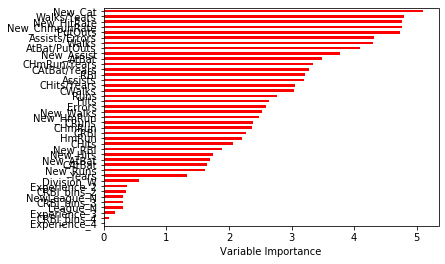

In [129]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [130]:
# **XGBOOST**

In [131]:
X_train = X_train.loc[:,~X_train.columns.duplicated(keep="last")]
X_test = X_test.loc[:,~X_test.columns.duplicated(keep="last")]

In [132]:
import xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

275.35228812790905

In [133]:
# **XGBOOST Model Tuning**

In [134]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [200,500,1000],
             "colsample_bytree": [0.4,0.7,1]}


In [135]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  4.6min finished


In [136]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 500}

In [137]:
xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(X_train, y_train)

In [138]:
y_pred = xgb_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

249.4692827113438

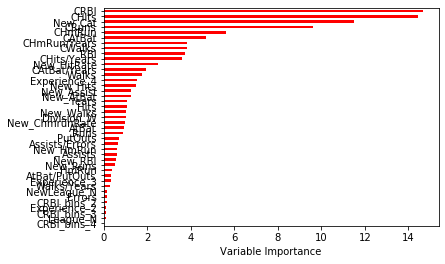

In [139]:
Importance = pd.DataFrame({'Importance':xgb_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [140]:
# **LightGBM**

In [141]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor().fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

253.23431931207247

In [142]:
lgb_model = LGBMRegressor()

In [143]:
lgbm_params = {"learning_rate": [0.01,0.001, 0.1, 0.5],
              "n_estimators": [200,500,1000],
              "max_depth": [2,4,6,7,10],
              "colsample_bytree": [1,0.8,0.5,0.4]}


In [144]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)


Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  2.5min finished


In [145]:
lgbm_cv_model.best_params_


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 200}

In [146]:
lgbm_tuned = LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)

y_pred = lgbm_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

256.60818082221755

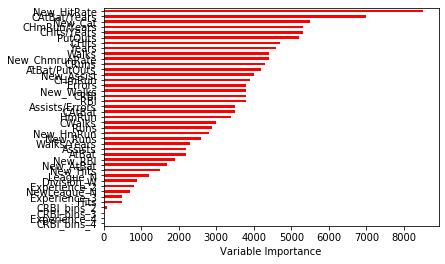

In [147]:
Importance = pd.DataFrame({'Importance':lgbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [148]:
X=df1.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


models = []

models.append(('Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(("XGBoost", XGBRegressor()))
models.append(("LightGBM", LGBMRegressor()))
models.append(("CatBoost", CatBoostRegressor(verbose = False)))


for name, model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(name,rmse)

Regression 285.64856792766017
Ridge 275.55118495892776
Lasso 268.83950520003566
ElasticNet 270.3224129293707
KNN 244.85166731996708
CART 306.44703669376753
RF 254.0474546104314
SVR 318.44247371980873
GBM 277.88110318052543
XGBoost 275.35228812790905
LightGBM 253.23431931207247
CatBoost 238.33318281742274


En iyi sonucu catboost ile elde ettim 